In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
abtest = pd.read_excel('ABTesting.xlsx')

In [9]:
abtest

,Date,Device,Address,Clicks,Visitors,Group
0,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/c...,159,199,Control
1,2023-05-18,Laptop,fyttlyf/business/campaign/get-paid///,18,1413,Experiment
2,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/s...,142,759,Control
3,2023-05-18,Laptop,fyttlyf/business/product/business-financial-se...,126,473,Control
4,2023-05-18,Laptop,fyttlyf/business/product/business-accept-payme...,129,183,Control
...,...,...,...,...,...,...
18094,2023-05-17,Tablet,fyttlyf/personal/campaign/weekoneoffer-terms///,12,13,Control
18095,2023-05-17,Mobile,fyttlyf/personal//send-money-to-india///,4,15,Experiment
18096,2023-05-17,Laptop,fyttlyf/personal/buy/fyttlyf-benefits///,12,42,Control
18097,2023-05-17,Tablet,fyttlyf/enterprise/product/enterprise-pay-late...,15,13,Control


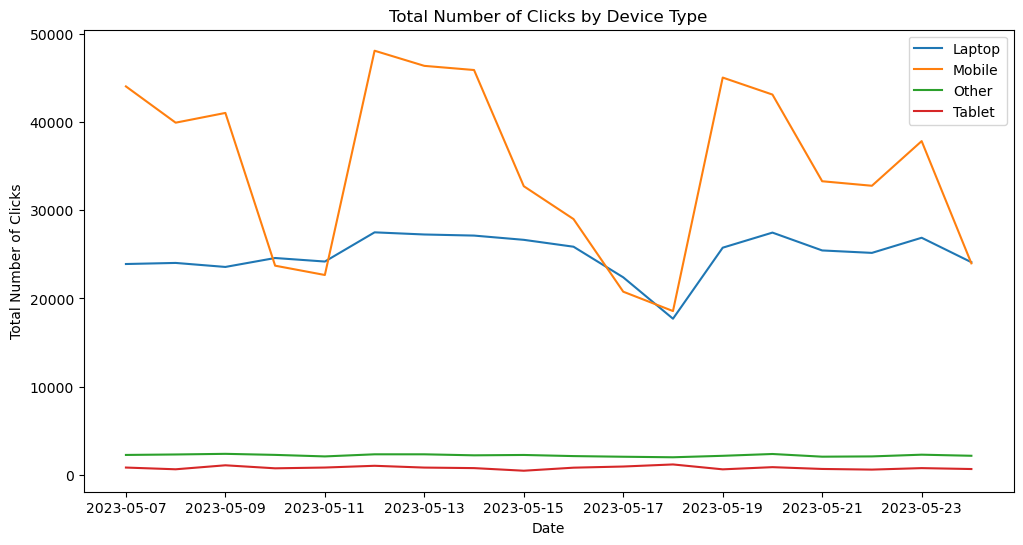

In [10]:
abtest['Date'] = pd.to_datetime(abtest['Date'])
device_clicks = abtest.groupby(['Date', 'Device'])['Clicks'].sum().unstack()
plt.figure(figsize=(12, 6))
for device in device_clicks.columns:
    plt.plot(device_clicks.index, device_clicks[device], label=device)
    
plt.title('Total Number of Clicks by Device Type')
plt.xlabel('Date')
plt.ylabel('Total Number of Clicks')
plt.legend()
plt.show()

In [11]:
from scipy.stats import norm

def calculate_sample_size(ctrl_conv_rate, mde, alpha, power):
  """
  Calculates the sample size required for each group in an A/B test.

  Args:
      ctrl_conv_rate (float): Conversion rate of the control group (baseline).
      mde (float): Minimum Detectable Effect (improvement or decline) as a proportion.
      alpha (float): Significance level (usually 1 - confidence level).
      power (float): Statistical power (1 - beta, probability of detecting effect).

  Returns:
      int: Sample size required for each group.
  """

  # Calculate z-statistic for desired confidence level
  z_alpha = norm.ppf(1 - alpha / 2)

  # Calculate z-statistic for desired power
  z_beta = norm.ppf(power)

  # Calculate pooled conversion rate (assuming equal allocation)
  pooled_conv_rate = (ctrl_conv_rate + (ctrl_conv_rate + mde)) / 2

  # Calculate the effect size (in standard deviations)
  effect_size = mde / pooled_conv_rate * np.sqrt(1 - pooled_conv_rate)

  # Calculate the sample size per group
  n_required = (z_alpha + z_beta) ** 2 / (effect_size**2)

  return int(np.ceil(n_required))

# Example usage (assuming control conversion rate of 3%)
ctrl_conv_rate = 0.03
mde = 0.03  # MDE of 3%
alpha = 0.05  # 95% confidence level
power = 0.8  # 80% statistical power

sample_size_per_group = calculate_sample_size(ctrl_conv_rate, mde, alpha, power)

print("Sample size required per group:", sample_size_per_group)

# In this example, you can compare sample_size_per_group with your actual sample size
# to determine if it's sufficient to conclude the test.


Sample size required per group: 19


In [12]:
import scipy.stats as stats

def perform_ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level=95):
    control_conversion_rate = control_conversions / control_visitors
    treatment_conversion_rate = treatment_conversions / treatment_visitors
    
    pooled_prob = (control_conversions + treatment_conversions) / (control_visitors + treatment_visitors)
    
    pooled_std_error = (pooled_prob * (1 - pooled_prob) * (1 / control_visitors + 1 / treatment_visitors)) ** 0.5
    
    z_score = (treatment_conversion_rate - control_conversion_rate) / pooled_std_error
    
    if confidence_level == 90:
        critical_z = 1.645
    elif confidence_level == 95:
        critical_z = 1.96
    elif confidence_level == 99:
        critical_z = 2.576
    else:
        raise ValueError("Invalid confidence level. Choose from 90, 95, or 99.")
    
    if z_score > critical_z:
        return "Treatment Group is Better"
    elif z_score < -critical_z:
        return "Control Group is Better"
    else:
        return "Indeterminate"

control_visitors = 1000
control_conversions = 50
treatment_visitors = 1000
treatment_conversions = 70
confidence_level = 95

result = perform_ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)
print("Result of A/B test:", result)


Result of A/B test: Indeterminate


In [13]:
result = perform_ab_test(
    abtest.loc[abtest['Group'] == 'Control', 'Clicks'].sum(),
    abtest.loc[abtest['Group'] == 'Control', 'Visitors'].sum(),
    abtest.loc[abtest['Group'] == 'Treatment', 'Clicks'].sum(),
    abtest.loc[abtest['Group'] == 'Treatment', 'Visitors'].sum(),
    confidence_level=95
)
print("Result of A/B test:", result)


Result of A/B test: Indeterminate


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2916\3207716801.py:5: RuntimeWarning: invalid value encountered in scalar divide
  treatment_conversion_rate = treatment_conversions / treatment_visitors
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2916\3207716801.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  pooled_std_error = (pooled_prob * (1 - pooled_prob) * (1 / control_visitors + 1 / treatment_visitors)) ** 0.5


In [5]:
import streamlit as st
from scipy import stats  # for statistical functions

# Title and description
st.title("A/B Testing Hypothesis Test")
st.write("This app performs hypothesis testing for A/B testing.")

# User input for control group
st.header("Control Group")
control_visitors = st.number_input("Number of Visitors in Control Group", min_value=1, step=1)
control_conversions = st.number_input("Number of Conversions in Control Group", min_value=0, step=1)

# User input for treatment group
st.header("Treatment Group")
treatment_visitors = st.number_input("Number of Visitors in Treatment Group", min_value=1, step=1)
treatment_conversions = st.number_input("Number of Conversions in Treatment Group", min_value=0, step=1)

# User input for confidence level
st.header("Confidence Level")
confidence_level = st.selectbox("Select Confidence Level", [90, 95, 99])

# Perform hypothesis test
if st.button("Run Hypothesis Test"):
  # Calculate conversion rates
  control_conversion_rate = control_conversions / control_visitors
  treatment_conversion_rate = treatment_conversions / treatment_visitors

  # Perform chi-square test
  contingency_table = [[control_conversions, control_visitors - control_conversions],
                       [treatment_conversions, treatment_visitors - treatment_conversions]]
  chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

  # Determine significance level based on confidence level
  significance_level = 1 - confidence_level / 100

  # Write results
  st.write("Chi-Square Statistic:", chi2)
  st.write("p-value:", p_value)
  if p_value < significance_level:
    st.write("We reject the null hypothesis. There is a significant difference in conversion rates.")
  else:
    st.write("We fail to reject the null hypothesis. There might not be a significant difference in conversion rates.")


2024-03-17 03:29:22.566 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [6]:
!streamlit run ab_test_app.py

'streamlit' is not recognized as an internal or external command,
operable program or batch file.
